In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../Preprocess/Preprocess.csv")
df.head()

,O3,NO2,NO,CO,PM10,PM2.5,Temp_Avg,RH_Avg,WSpeed_Avg,WDir_Avg,Press_Avg,Rad_Avg,Rain_Tot
0,42.098597,2.377042,0.378701,0.269903,32.476493,20.131194,19.830514,29.753889,2.439608,154.966895,804.314569,630.264466,0.0
1,44.560389,1.889646,0.215486,0.244556,28.960708,18.765649,20.916111,27.642535,2.883990,231.153622,803.925649,659.373538,0.0
2,50.777618,4.491722,0.745514,0.397743,49.597222,35.021854,21.357729,30.954847,1.604234,178.251752,803.767500,485.725435,0.0
3,50.881806,4.101944,0.455646,0.384681,48.555437,35.872396,21.968729,35.661208,1.729689,183.150144,804.870299,422.336301,0.0
4,52.673167,4.675542,0.458521,0.442660,52.817632,41.230729,21.668757,42.649750,1.900280,137.419527,805.930109,449.436559,0.2


In [3]:
meteorological = ['Temp_Avg', 'RH_Avg','WSpeed_Avg', 'WDir_Avg', 'Press_Avg', 'Rad_Avg', 'Rain_Tot']

# O3

In [4]:
X = df[meteorological].values
Y = df["O3"].values

In [5]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2)

In [6]:
Xtrain.shape

(252, 7)

In [7]:
Xtest.shape

(63, 7)

## XGBoost

In [78]:
model = XGBRegressor(
    n_estimators = 85,
    learning_rate = 0.05,
    max_depth = 2,
    subsample = 0.3,
    n_jobs = -1,
    reg_alpha = 1,
)
model.fit(Xtrain, Ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=85, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [79]:
Ypred = model.predict(Xtest)

In [80]:
mean_squared_error(Ytest, Ypred)

np.float64(25.7634375996021)

In [56]:
df["O3"].describe()

count    315.000000
mean      34.047492
std       10.050266
min       10.572918
25%       26.026326
50%       33.601257
75%       41.751736
max       61.173903
Name: O3, dtype: float64

## Simple linear regression

In [81]:
B = np.linalg.inv(Xtrain.T @ Xtrain) @ Xtrain.T @ Ytrain
B

array([ 1.31114397, -0.37591133, -1.38033139, -0.04169575,  0.04741273,
        0.00473243,  0.29435808])

In [83]:
Ypred = Xtest @ B
Ypred

array([34.38401851, 28.46206164, 34.98341862, 49.2520908 , 33.20751453,
       29.62375095, 28.62250963, 24.84189346, 47.12754066, 29.2780263 ,
       28.56459346, 32.87350085, 43.7077358 , 31.23732327, 31.37598273,
       32.14798695, 42.94042398, 30.55743433, 35.30572287, 33.35310542,
       26.7769898 , 37.25586506, 44.49020847, 37.54219192, 35.54847778,
       38.15572705, 30.86526004, 43.20211521, 31.3654384 , 35.93186518,
       36.46141   , 31.68647115, 23.99493471, 25.23399564, 40.01327077,
       37.43625196, 31.17541408, 41.83970197, 46.70760776, 35.48391655,
       17.9071088 , 27.71281392, 25.58582126, 49.61782697, 34.39479425,
       28.10144745, 38.11694765, 30.49051184, 41.95025393, 41.17170989,
       26.52378387, 31.79084115, 32.27832297, 26.07456733, 25.79563067,
       34.24080052, 41.12095696, 33.38166716, 34.44647426, 35.28429513,
       33.31940748, 33.97307467, 44.65065662])

In [85]:
mean_squared_error(Ytest, Ypred)

np.float64(34.330744733053265)

# PM2.5

In [86]:
Y = df["PM2.5"].values

In [87]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2)

## XGBoost

In [116]:
model = XGBRegressor(
    n_estimators = 80,
    learning_rate = 0.05,
    max_depth = 3,
    subsample = 0.1,
    n_jobs = -1,
)
model.fit(Xtrain, Ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=80, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [117]:
Ypred = model.predict(Xtest)

In [118]:
mean_squared_error(Ytest, Ypred)

np.float64(24.246480934937864)

In [91]:
df["PM2.5"].describe()

count    315.000000
mean      17.477252
std        7.859164
min        4.305268
25%       11.461674
50%       16.138854
75%       22.416757
max       43.092472
Name: PM2.5, dtype: float64

## Simple linear regression

In [119]:
B = np.linalg.inv(Xtrain.T @ Xtrain) @ Xtrain.T @ Ytrain
B

array([ 1.25217162, -0.2700521 , -3.79962691,  0.00891852,  0.03063046,
       -0.01861118, -0.11151216])

In [120]:
Ypred = Xtest @ B
Ypred

array([29.17389672, 22.79156964, 11.11665811, 13.64272605, 16.56679613,
       13.69385842, 31.12378579, 26.03467003, 18.18920012, 15.7213714 ,
       23.40266811, 18.51790893, 17.15212053, 30.71986451, 22.34518592,
       26.07231565, 14.35994605, 20.7903536 , 18.27327094, 18.10448672,
       11.46476893, 24.31432108, 15.07145252, 17.5995545 , 14.09186479,
       22.50821537, 11.42031919, 16.22339079, 17.2199388 , 18.13779017,
       27.28255201,  9.84353018, 15.87135252, 15.11154151, 14.06089353,
       23.0518027 , 16.16079945, 18.66658332, 17.09309181, 17.83840673,
        9.89861767, 16.25131749, 16.43638947, 17.33225199, 14.83915292,
       21.27138383, 20.59488001, 17.3853072 , 12.98028641, 14.46202096,
       15.99358407, 11.03327813, 17.08766481,  7.60147464, 16.45223725,
       16.79180552, 13.81070863, 13.76122389, 20.56585207, 13.72747381,
       25.59736743, 15.62100559, 15.28012607])

In [121]:
mean_squared_error(Ytest, Ypred)

np.float64(29.344524946827853)

# Neural network for both variables

In [1]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F 
import fastai.tabular.all as ft

In [36]:
df = pd.read_csv("../Preprocess/Preprocess.csv")
variables = ['Temp_Avg', 'RH_Avg','WSpeed_Avg', 'WDir_Avg', 'Press_Avg', 'Rad_Avg', 'Rain_Tot', "O3", "PM2.5"]
df = df[variables]

In [42]:
src = ft.TabularPandas(df,
                     procs=[ft.Normalize],
                     cont_names = ['Temp_Avg', 'RH_Avg','WSpeed_Avg', 'WDir_Avg', 'Press_Avg', 'Rad_Avg', 'Rain_Tot'],
                     y_names=["O3", "PM2.5"],
                     splits=ft.RandomSplitter(0.2)(ft.range_of(df))
                     )

dls = src.dataloaders(bs=32)

In [43]:
def mse_o3(yp, y):
    return ft.mse(yp[:,0], y[:,0])

def mse_pm25(yp, y):
    return ft.mse(yp[:,1], y[:,1])

In [44]:
learner = ft.tabular_learner(dls,
                             layers=[512,512],
                             metrics=[mse_o3, mse_pm25],
                             opt_func=ft.Adam
                             )

c:\Users\Fernando\anaconda3\envs\redes\Lib\site-packages\fastai\learner.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **

SuggestedLRs(valley=0.009120108559727669)

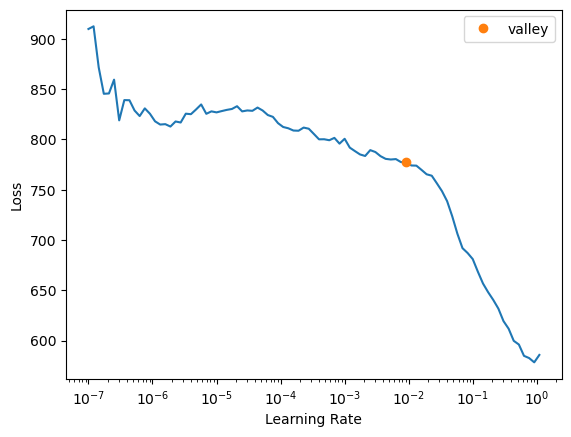

In [45]:
learner.lr_find()

In [46]:
learner.fit_one_cycle(25, 0.04)

epoch,train_loss,valid_loss,mse_o3,mse_pm25,time
0,755.529053,746.175232,1171.472412,320.877991,00:00
1,761.463562,672.206299,1059.077881,285.334717,00:00
2,715.345032,491.515045,766.538330,216.491760,00:00
3,596.784546,102.971306,122.250603,83.692024,00:00
4,476.697235,233.941818,363.094971,104.788681,00:00
5,385.301758,112.280502,179.207748,45.353268,00:00
6,317.871368,51.291428,42.177292,60.405563,00:00
7,266.316803,51.770016,55.881264,47.658764,00:00
8,224.588440,32.895332,32.379215,33.411449,00:00
9,192.157150,27.945906,26.212353,29.679459,00:00


In [47]:
learner.export("NN_O3_PM25.pkl")